In [1]:
pip install itertools

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement itertools (from versions: none)
ERROR: No matching distribution found for itertools


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score as ss
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import itertools


In [5]:
data = pd.read_csv('placement.csv')

data

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


# New Section

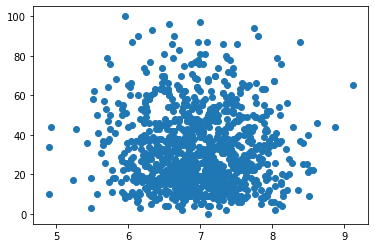

In [8]:
score_df = data[['cgpa', 'placement_exam_marks']]
cgpa, marks = df.cgpa, df.placement_exam_marks

plt.scatter(cgpa, marks)

In [105]:
X = score_df.to_numpy()

dbscan_cluster_model = DBSCAN().fit(X)
dbscan_cluster_model

DBSCAN()

In [106]:
score_df['cluster'] = dbscan_cluster_model.labels_

score_df

,cgpa,placement_exam_marks,cluster
0,7.19,26.0,0
1,7.46,38.0,1
2,7.54,40.0,-1
3,6.42,8.0,2
4,7.23,17.0,3
...,...,...,...
995,8.87,44.0,-1
996,9.12,65.0,-1
997,4.89,34.0,-1
998,8.62,46.0,-1


In [107]:
score_df['cluster'].value_counts()

-1     177
 3      25
 17     24
 8      23
 37     23
      ... 
 51      6
 40      6
 45      5
 52      5
 57      5
Name: cluster, Length: 61, dtype: int64

In [108]:

fig = px.scatter(x=cgpa, y=marks, color=score_df['cluster'])

fig.show()

In [109]:
ss(X, score_df['cluster'])

0.3693717328405717

In [110]:
epsilons = np.linspace(0.1, 1, num=15)
epsilons

array([0.1       , 0.16428571, 0.22857143, 0.29285714, 0.35714286,
       0.42142857, 0.48571429, 0.55      , 0.61428571, 0.67857143,
       0.74285714, 0.80714286, 0.87142857, 0.93571429, 1.        ])

In [111]:
min_samples = np.arange(1, 15, step=2)
min_samples

array([ 1,  3,  5,  7,  9, 11, 13])

In [112]:
combinations = list(itertools.product(epsilons, min_samples))
combinations

[(0.1, 1),
 (0.1, 3),
 (0.1, 5),
 (0.1, 7),
 (0.1, 9),
 (0.1, 11),
 (0.1, 13),
 (0.1642857142857143, 1),
 (0.1642857142857143, 3),
 (0.1642857142857143, 5),
 (0.1642857142857143, 7),
 (0.1642857142857143, 9),
 (0.1642857142857143, 11),
 (0.1642857142857143, 13),
 (0.2285714285714286, 1),
 (0.2285714285714286, 3),
 (0.2285714285714286, 5),
 (0.2285714285714286, 7),
 (0.2285714285714286, 9),
 (0.2285714285714286, 11),
 (0.2285714285714286, 13),
 (0.2928571428571429, 1),
 (0.2928571428571429, 3),
 (0.2928571428571429, 5),
 (0.2928571428571429, 7),
 (0.2928571428571429, 9),
 (0.2928571428571429, 11),
 (0.2928571428571429, 13),
 (0.3571428571428572, 1),
 (0.3571428571428572, 3),
 (0.3571428571428572, 5),
 (0.3571428571428572, 7),
 (0.3571428571428572, 9),
 (0.3571428571428572, 11),
 (0.3571428571428572, 13),
 (0.4214285714285715, 1),
 (0.4214285714285715, 3),
 (0.4214285714285715, 5),
 (0.4214285714285715, 7),
 (0.4214285714285715, 9),
 (0.4214285714285715, 11),
 (0.4214285714285715, 13),
 

In [113]:
N = len(combinations)
N

105

In [114]:
def get_scores_and_labels(combinations, X):
  scores = []
  all_labels_list = []

  for i, (eps, num_samples) in enumerate(combinations):
    dbscan_cluster_model = DBSCAN(eps=eps, min_samples=num_samples).fit(X)
    labels = dbscan_cluster_model.labels_
    labels_set = set(labels)
    num_clusters = len(labels_set)
    if -1 in labels_set:
      num_clusters -= 1

    if (num_clusters < 2) or (num_clusters > 50):
      scores.append(-10)
      all_labels_list.append('bad')
      c = (eps, num_samples)
      print(f"Combination {c} on iteration {i+1} of {N} has {num_clusters} clusters. Moving on")
      continue

    scores.append(ss(X, labels))
    all_labels_list.append(labels)
    print(f"Index: {i}, Score: {scores[-1]}, Labels: {all_labels_list[-1]}, NumClusters: {num_clusters}")

  best_index = np.argmax(scores)
  best_parameters = combinations[best_index]
  best_labels = all_labels_list[best_index]
  best_score = scores[best_index]

  return {'best_epsilon': best_parameters[0],
          'best_min_samples': best_parameters[1],
          'best_labels': best_labels,
          'best_score': best_score}

best_dict = get_scores_and_labels(combinations, X)

Combination (0.1, 1) on iteration 1 of 105 has 525 clusters. Moving on
Combination (0.1, 3) on iteration 2 of 105 has 94 clusters. Moving on
Index: 2, Score: -0.4992091854140882, Labels: [ 0 -1 -1 -1  1 -1 -1 -1 -1 -1  2 -1  2 -1 -1  3  4 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  5 -1 -1 -1 -1 -1 -1 -1  2 -1 -1  1 -1 12 -1 -1 -1 -1  6 -1
 -1 -1  7 -1  8 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  5 -1 -1 -1 -1 -1  9  3 -1
 -1 10 -1 -1 -1 -1 -1 20 -1 -1 11 -1 -1  3 -1 -1  6 22 -1 -1  3 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  6 -1 -1 -1 11 -1 -1 -1
 -1 -1 11 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 11 22 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  3 -1 -1 -1 -1 -1 -1 -1 -1  7 -1 -1 -1 -1 -1 -1 24 -1
 12 -1 -1 -1 13 -1 -1 -1 -1 14 -1 -1 -1 -1 -1 -1 -1 -1  4 15 -1  4 -1 -1
 -1  2 -1 -1 -1 16 -1 -1  5 -1 17  5 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2
 -1 -1 -1 -1 -1 -1 -1 -1 -1 10 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 22 -1
 -1 -1 -1 

Index: 10, Score: -0.44917515571092054, Labels: [20 -1 -1 -1 16 -1 19 -1 -1 -1  0 -1  0 -1 -1  1 -1  6 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  2  3 -1 -1 -1 -1 -1 -1  0 -1 14 16 -1 -1 -1 -1 -1  4  5 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  6 -1 -1 -1 -1 -1 -1 -1 16 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2 -1 -1  5 -1 -1 -1  1 -1
 -1  7 -1 -1 -1 -1 -1 15 -1 -1  8 13 -1  1 -1 -1  5  9 -1 -1  1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  5 -1 -1 -1  8 -1 -1 -1
 -1 -1  8 19 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  8  9 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  4 -1 -1 -1 -1
 -1 -1 -1 -1 10 -1 -1 -1 -1  3 -1 -1 -1 -1 -1  0 -1 -1 -1 11 -1 -1 -1  6
 -1  0 -1 -1 -1 12 -1 -1  2 -1 -1  2  5 -1 11 -1 -1 -1 -1  7 -1 -1 -1  0
 -1 -1 -1 -1 -1 -1 -1 -1 -1  7 -1 -1 -1 -1 -1 -1 -1 -1 -1  4 -1 -1  4 -1
 -1 -1 -1 -1  1  0  0 -1 -1 13 -1 -1 -1  3 -1 -1 -1  6 -1 -1 -1 -1 -1 -1
  1 13 -1 11 -1 19 17 -1  2 -1 -1 -1  7 -1 -1 -1 18 -1  2 -1 -1 -1 -1 -1
 -1

Index: 17, Score: -0.2976023822629706, Labels: [23 -1 -1 -1  0 12  1 -1  2 -1  3 -1  3 -1 -1  4 -1  5 -1 -1 -1 21 -1 -1
 -1 -1 -1 -1  6  7  8 -1 -1 -1 -1 -1  3 -1 22  0 -1  2 -1 -1 -1  9 10 -1
 -1 -1 13 24 -1 -1 -1 -1  7 -1 -1 -1 -1 -1  5 -1 11 24 -1 -1 -1 -1  0 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  6 -1 20 10 -1 -1 -1  4 -1
 -1 11 -1 12 -1 -1 -1 13 -1 -1 14 19 -1  4 -1 -1 10  9 -1 -1  4 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 10 -1 -1 -1 14 -1 -1 -1
 20 -1 14  1 -1 -1 -1  8 -1 -1 -1 -1 -1 -1 -1 14  9 -1 -1 15 -1 -1 -1 -1
 -1 -1 -1  2 -1 -1  4 -1 -1 -1 -1 -1 -1 -1 -1 13 -1 -1 -1  9 -1 19 12 -1
  2 -1 -1 -1 16 -1 -1 -1 -1  7 -1 -1 -1 -1 -1  3 -1 -1 -1 17 -1 -1 -1  5
 -1  3 -1 -1 -1 18 -1 -1  6 -1 -1  6 10 -1 17 -1 -1 -1 -1 11 -1 11 -1  3
 -1 -1 -1 -1 -1 -1 -1 -1 -1 11 -1 -1 -1 -1 -1 -1 -1 -1 -1  9 -1  1  9 -1
 -1 -1 -1 -1  4  3  3 -1 -1 19 -1 -1 -1  7 -1 -1 -1  5 -1 -1 -1 -1 -1 18
  4 19 -1 17 -1  1 20 -1  6 25 -1  7 11 -1 -1 -1 21 -1  6 -1 -1 -1 -1 -1
 -1 

Index: 25, Score: -0.32273210323590623, Labels: [19 -1 -1 -1  0  8  1 -1  2 -1  3 -1  3 -1 -1  4 -1 -1 -1 -1 -1 -1 -1 -1
  1 -1 -1 -1  5  6 -1 -1 -1 -1 -1 -1  3 -1 -1  0 -1  2 -1 -1 -1  7 17 -1
 -1 -1  9 -1 -1 -1 -1 -1  6 -1 -1 -1 -1 -1 -1 -1 14 20 -1 -1 -1 -1  0 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  5 -1 18 17 -1 -1 -1  4 -1
 -1 14 -1  8 -1 -1 -1  9 -1 -1 10 15 -1  4 -1 -1 17  7 -1 -1  4 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 17 -1 -1 -1 10 -1 -1 -1
 -1 -1 10  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 10  7 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1  2 -1 -1  4 -1 -1 -1 -1 -1 -1 -1 -1  9 -1 -1 -1  7 -1 15  8 -1
  2 -1 -1 -1 11 -1 -1 -1 -1  6 -1 -1 -1 -1 -1  3 -1 -1 -1 12 -1 -1 -1 -1
 -1  3 -1 -1 -1 13 -1 -1  5 -1  4  5 17 -1 12 -1 -1 -1 -1 14 -1 14 -1  3
 -1 -1 -1 -1 -1 -1 -1 -1 -1 14 -1 -1 -1 -1 -1 -1 -1 -1 -1  7 -1  1  7 -1
 -1 -1 -1 -1  4  3  3  4 -1 15 -1 -1 -1  6 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  4 15 -1 12 -1  1 18 -1  5 16 -1  6 14 -1 -1 -1 -1 -1  5 -1 -1 -1 -1 -1
 -1

Index: 31, Score: 0.0519146667453003, Labels: [ 0  6 -1  1  2  3  4  5  6 -1  7 -1  7 -1 -1  8  9 10 20 -1 23 11 27 -1
  4 -1 29 12 13 14 15 -1 -1 -1 -1 -1  7 -1 16  2 -1  6 -1 -1 -1 17 14 12
 30 -1 18 19 20 11 -1 -1 14 -1 -1 36 -1 -1 10 -1 22 19 21 -1 38 -1  2 -1
 -1 42 -1 -1 -1 19 -1 -1 12 -1 -1 16 -1 19 24 13  5  2 14 -1 40 38  8 43
 19 22 -1  3 12  0 -1 18 23 42 24 25 -1  8 21 26 14 17 -1 -1  8 -1 27  5
 12 -1 -1 -1 -1 -1 -1  3 28  5 -1 -1 -1 -1 -1 23 14 -1 29 -1 24 18 -1 26
  2 19 24  4 -1 -1 -1 15 -1 -1 -1 -1 32 -1 -1 24 17 -1 -1 30 -1 -1 -1 41
 31 -1 31  6 -1 41  8  0 38 -1 -1 -1 -1 30 -1 18 11 21 40 17 -1 25  3  1
  6 33 -1 -1 32 -1 -1 28 -1 14 -1 -1 -1 23 28  7 -1 43  9 33 -1  9 -1 10
 -1  7 -1 -1 15 34 -1 -1 13 35  8 13 14 35 33 -1 -1 -1 -1 22 -1 22 -1  7
  6 -1 -1 -1 -1 -1  0 -1 -1 22 35 -1 -1 -1 -1 -1 -1 -1 -1 17 -1  4 17 -1
 -1 -1 -1 -1  8  7  7  8 -1 25 -1 -1 12 14 -1 -1 -1 10 -1 -1 -1 -1 -1 34
  8 25 -1 33 -1  4  2 -1 13 36 -1 14 22 -1 -1 -1 11 36 13 37 23 21 -1 -1
 -1 1

Combination (0.4214285714285715, 1) on iteration 36 of 105 has 181 clusters. Moving on
Combination (0.4214285714285715, 3) on iteration 37 of 105 has 77 clusters. Moving on
Combination (0.4214285714285715, 5) on iteration 38 of 105 has 58 clusters. Moving on
Index: 38, Score: 0.1786109164031532, Labels: [ 0  6 -1  1  2  3  4  5  6 -1  7 -1  7 -1 -1  8  9 10 11 -1 28 12 31  4
  4 -1 13 14 15 16 17 -1 -1 11 -1 -1  7 -1 18  2 -1  6 -1 -1 -1 19 16 14
 34 21 20 21 11 12 -1 16 16 -1 35 22 24 -1 10  0 23 21 24 -1 25 -1  2 18
 -1 26 -1 -1 -1 21 -1 -1 14 -1 -1 18 -1 21 29 15  5  2 16 -1 45 25  8 27
 21 23 -1  3 14  0 -1 20 28 26 29 30 -1  8 24 12 16 19 -1 32  8 -1 31  5
 14 -1 -1 -1 25 -1 32  3 33  5 -1 -1 -1 -1 -1 28 16 -1 13 -1 29 20 41 12
  2 21 29  4 43 -1 -1 17 -1 -1 31 -1 37 -1 -1 29 19 -1 -1 34 37 -1 -1 36
 32 -1 32  6 35 36  8  0 25 -1  5 -1 -1 34 -1 20 12 24 45 19 -1 30  3  1
  6 38 -1 -1 37 11 -1 33 -1 16 36 -1 -1 28 33  7 -1 27  9 38 -1  9 -1 10
 -1  7 23 -1 17 39 -1  4 15 40  8 15 1

Index: 46, Score: 0.0825005285487129, Labels: [ 0  4 -1 -1  1  2  3 21  4 -1  5 -1  5 -1 -1  6  7 -1 17 -1 24  8 -1  3
  3 -1 36  9 10 11 12 -1 -1 -1 -1 -1  5 -1 13  1 -1  4 -1 -1 -1 14 11  9
 28 -1 15 16 17  8 -1 11 11 -1 38 34 19 -1 -1  0 18 16 19 -1 22 -1  1 13
 -1 -1 -1 -1 -1 16 -1 -1  9 -1 -1 13 -1 16 20 10 21  1 11 -1 -1 22  6 23
 16 18 -1  2  9  0 -1 15 24 -1 20 25 -1  6 19  8 11 14 -1 26  6 -1 -1 21
  9 -1 -1 -1 -1 35 26  2 27 21 -1 -1 -1 -1 -1 24 11 -1 36 -1 20 15 -1  8
  1 16 20  3 -1 -1 -1 12 -1 -1 -1 -1 30 -1 -1 20 14 -1 -1 28 30 -1 -1 37
 29 -1 29  4 38 37  6  0 22 -1 21 -1 -1 28 -1 15  8 19 -1 14 -1 25  2 -1
  4 31 -1 -1 30 17 -1 27 -1 11 37 18 -1 24 27  5 -1 23  7 31 -1  7 -1 -1
 -1  5 18 -1 12 32 -1  3 10 33  6 10 11 33 31 23 30 -1 -1 18 -1 18 -1  5
  4 -1 -1 35 -1 -1  0 -1 -1 18 33 -1 -1 -1 -1 -1 37 -1 -1 14 -1  3 14 -1
 16 -1 -1 -1  6  5  5  6 -1 25 -1 -1  9 11 -1 -1 35 -1 -1 -1 -1 -1 -1 32
  6 25 -1 31 -1  3  1 -1 10 34 -1 11 18 -1 30 -1  8 34 10 16 24 19 -1 -1
 35 1

Index: 54, Score: -0.0023363115092795185, Labels: [ 0  4 -1 -1  1  2  3 17  4 -1  5 -1  5 -1 -1  6 -1 -1 30 -1 25 12 -1  3
  3 -1 -1 19  7  8 -1 -1  3 -1 -1 -1  5 -1  9  1 -1  4 -1 -1 -1 10  8 19
 22 -1 11 15 30 12 -1  8  8 27 -1 29 -1 -1 -1  0 13 15 14 -1 -1 -1  1  9
 -1 -1 -1 -1 -1 15 -1 -1 19 -1 -1  9 -1 15 16  7 17  1  8 -1 -1 31  6 18
 15 13 -1  2 19  0 -1 11 25 -1 16 20 -1  6 14 12  8 10 -1 -1  6 -1 -1 17
 19 -1 -1 -1 -1 -1 -1  2 21 17 -1 -1 -1 -1 -1 25  8 -1 -1 -1 16 11 -1 12
  1 15 16  3 -1 -1 -1 -1 -1 -1 -1 -1 24 -1 -1 16 10 -1 -1 22 24 -1 -1 -1
 23 -1 23  4 -1 -1  6  0 31 -1 -1 -1 -1 22 -1 11 -1 14 -1 10 -1 20  2 -1
  4 26 -1 -1 24 30 -1 21 -1  8 -1 13 -1 25 21  5 -1 18 -1 26 -1 -1 -1 -1
 -1  5 13 -1 -1 27 -1  3  7 28  6  7  8 28 26 18 24 -1 -1 13 -1 13 -1  5
  4 -1 -1 -1 -1 -1  0 -1 -1 13 28 -1 -1 -1 -1 -1 -1 -1 -1 10 -1  3 10 -1
 -1 -1 -1 -1  6  5  5  6 -1 20 -1 -1 19  8 -1 -1 -1 -1 -1 -1 -1 -1 -1 27
  6 20 -1 26 -1  3  1 -1  7 29 -1  8 13 -1 24 -1 12 29  7 15 25 14 -1 -1
 

Index: 61, Score: 0.06016016808740922, Labels: [ 0  5 -1 33  1  2  3  4  5 -1  6 -1  6 -1 -1  7 -1 -1 32 -1 26 15 -1  3
  3 -1 33  8  9 10 -1 -1  3 -1 -1 -1  6 -1 11  1 -1  5 -1 -1 -1 12 10  8
 23 -1 13 14 32 15 -1 10 10 28 -1 30 17 -1 -1  0 16 14 17 -1 19 -1  1 11
 -1 -1 -1 -1 -1 14 -1 -1  8 -1 -1 11 -1 14 18  9  4  1 10 -1 -1 19  7 20
 14 16 -1  2  8  0 -1 13 26 -1 18 21 -1  7 17 15 10 12 -1 24  7 -1 -1  4
  8 -1 -1 -1 -1 -1 24  2 22  4 -1 -1 -1 -1 -1 26 10 -1 33 -1 18 13 -1 15
  1 14 18  3 -1 -1 -1 -1 -1 -1 -1 -1 25 -1 -1 18 12 -1 -1 23 25 -1 -1 31
 24 -1 24  5 -1 31  7  0 19 -1  4 -1 -1 23 -1 13 15 17 -1 12 -1 21  2 33
  5 27 -1 -1 25 32 -1 22 -1 10 31 16 -1 26 22  6 -1 20 -1 27 -1 -1 -1 -1
 -1  6 16 -1 -1 28 -1  3  9 29  7  9 10 29 27 20 25 -1 -1 16 -1 16 -1  6
  5 -1 -1 -1 -1 -1  0 -1 -1 16 29 -1 -1 -1 -1 -1 31 -1 -1 12 -1  3 12 -1
 14 -1 -1 -1  7  6  6  7 -1 21 -1 -1  8 10 -1 -1 -1 -1 -1 -1 -1 -1 -1 28
  7 21 -1 27 -1  3  1 -1  9 30 -1 10 16 -1 25 -1 15 30  9 14 26 17 -1 -1
 -1 

Index: 68, Score: 0.10653510118652189, Labels: [ 0  5 -1 33  1  2  3  4  5 -1  6 -1  6 -1 -1  7 -1 -1  8 -1 28 16 -1  3
  3 -1 33  9 10 11 -1 -1  3 -1 -1 -1  6 -1 12  1 -1  5 -1 -1 35 13 11  9
 26 -1 14 15  8 16 -1 11 11 30 34 17 19 -1 -1  0 18 15 19 -1 21 -1  1 12
 -1 -1 -1 -1 -1 15 -1 -1  9 -1 -1 12 -1 15 20 10  4  1 11 -1 -1 21  7 22
 15 18 -1  2  9  0 -1 14 28 -1 20 23 -1  7 19 16 11 13 -1 24  7 -1 -1  4
  9 -1 -1 18 -1 35 24  2 25  4 -1 -1 -1 -1 -1 28 11 -1 33 -1 20 14 -1 16
  1 15 20  3 -1 -1 -1 -1 -1 -1 -1 -1 27 -1 -1 20 13 18 -1 26 27 -1 -1 32
 24 -1 24  5 34 32  7  0 21 -1  4 -1 -1 26 -1 14 16 19 -1 13 -1 23  2 33
  5 29 -1 -1 27  8 -1 25 -1 11 32 18 -1 28 25  6 -1 22 -1 29 -1 -1 -1 -1
 -1  6 18 -1 -1 30 -1  3 10 31  7 10 11 31 29 22 27 -1 -1 18 -1 18 -1  6
  5 -1 -1 35 -1 -1  0 -1 -1 18 31 -1 -1 -1 -1 -1 32 -1 -1 13 -1  3 13 -1
 15 -1 -1 -1  7  6  6  7 -1 23 -1 -1  9 11 -1 -1 35 -1 -1 -1 -1 -1 -1 30
  7 23 -1 29 -1  3  1 -1 10 17 -1 11 18 -1 27 -1 16 17 10 15 28 19 -1 -1
 35 

Index: 75, Score: 0.14472721695471427, Labels: [ 0  5 -1 36  1  2  3  4  5 -1  6 -1  6 -1 30  7 -1 -1  8 -1 24 16 -1  3
  3 -1 36  9 10 11 -1 -1  3  8 -1 20  6 -1 12  1 -1  5 -1 -1 35 13 11  9
 29 15 14 15  8 16 -1 11 11 32 30 17 19 -1 -1  0 18 15 19 -1 22 -1  1 12
 -1 20 -1 -1 -1 15 -1 -1  9 -1 20 12 -1 15 21 10  4  1 11 -1 -1 22  7 23
 15 18 -1  2  9  0 -1 14 24 20 21 25 -1  7 19 16 11 13 -1 26  7 -1 -1  4
  9  8 -1 18 22 35 26  2 27  4 -1 -1 -1 -1 -1 24 11 -1 36 -1 21 14 -1 16
  1 15 21  3 -1 -1 -1 -1 -1 -1 -1 20 28 -1 -1 21 13 18 -1 29 28 -1 -1 34
 26 -1 26  5 30 34  7  0 22 -1  4 -1 -1 29 -1 14 16 19 -1 13 -1 25  2 36
  5 31 -1 -1 28  8 -1 27 -1 11 34 18 -1 24 27  6 20 23 -1 31 -1 -1 -1 -1
 -1  6 18 -1 -1 32 -1  3 10 33  7 10 11 33 31 23 28 -1 -1 18 -1 18 -1  6
  5 -1 -1 35 -1 -1  0 -1 -1 18 33 -1 -1 -1 -1 -1 34 -1 -1 13 -1  3 13 -1
 15 -1 -1 -1  7  6  6  7 -1 25 -1  4  9 11 -1 -1 35 -1 -1 -1 -1 -1 -1 32
  7 25 -1 31 -1  3  1 -1 10 17 34 11 18 -1 28 -1 16 17 10 15 24 19 -1 -1
 35 

Index: 82, Score: 0.1521537371884497, Labels: [ 0  5 -1 31  1  2  3  4  5 -1  6 -1  6  0 18  7 -1 -1  8 -1 25  9 -1  3
  3 -1 31 10 11 12 -1 -1  3  8 -1 13  6 -1 14  1 -1  5 -1 -1 36 15 12 10
 30 17 16 17  8  9 -1 12 12 33 18 19 21 -1 -1  0 20 17 21 -1 23 -1  1 14
 -1 13 -1 -1 -1 17 13 -1 10 -1 13 14 -1 17 22 11  4  1 12 -1 -1 23  7 24
 17 20 -1  2 10  0 -1 16 25 13 22 26 -1  7 21  9 12 15 -1 27  7 -1 -1  4
 10  8 -1 20 23 36 27  2 28  4 -1 -1 -1 -1 -1 25 12 -1 31 -1 22 16 -1  9
  1 17 22  3 -1 -1 -1 -1 -1 -1 -1 13 29 -1 -1 22 15 20 -1 30 29 -1 -1 35
 27 -1 27  5 18 35  7  0 23 -1  4 -1 -1 30 -1 16  9 21 -1 15 -1 26  2 31
  5 32  9 -1 29  8 -1 28 -1 12 35 20 -1 25 28  6 13 24 -1 32 -1 -1 -1 -1
 -1  6 20 -1 -1 33 -1  3 11 34  7 11 12 34 32 24 29 -1 -1 20 -1 20 -1  6
  5 -1 -1 36 -1 -1  0 -1 -1 20 34 -1 -1 -1 -1 -1 35 -1 -1 15 -1  3 15 -1
 17 -1 -1 -1  7  6  6  7 -1 26 -1  4 10 12 -1 -1 36 -1 -1 -1 -1 -1 -1 33
  7 26 -1 32 -1  3  1 -1 11 19 35 12 20 -1 29 -1  9 19 11 17 25 21 -1 -1
 36 1

Index: 89, Score: 0.15643306942966415, Labels: [ 0  1 -1 11  2  3  4  5  1 -1  6 -1  6  0 20  7 -1 -1  8 -1  9 10 -1  4
  4 -1 11 12 13 14 -1 -1  4  8 -1 15  6 -1 16  2 -1  1 -1 -1 29 17 14 12
 32 19 18 19  8 10 -1 14 14 35 20 21 23 -1 -1  0 22 19 23 -1 24 -1  2 16
 -1 15 -1 -1 15 19 15 -1 12 -1 15 16 -1 19 25 13  5  2 14 -1 -1 24  7 26
 19 22 -1  3 12  0 -1 18  9 15 25 27 -1  7 23 10 14 17 -1 28  7 -1 -1  5
 12  8 -1 22 24 29 28  3 30  5 -1 -1 -1 -1 -1  9 14 -1 11 -1 25 18 -1 10
  2 19 25  4 -1 -1 -1 -1 -1 -1 -1 15 31 -1 -1 25 17 22 -1 32 31 -1 -1 33
 28 -1 28  1 20 33  7  0 24 -1  5 -1 -1 32 -1 18 10 23 -1 17 29 27  3 11
  1 34 10 -1 31  8 -1 30 -1 14 33 22 -1  9 30  6 15 26 -1 34 -1 -1 -1 -1
 -1  6 22 -1 -1 35 -1  4 13 36  7 13 14 36 34 26 31 -1 -1 22 -1 22 -1  6
  1 -1 -1 29 -1 -1  0 -1 -1 22 36 -1 -1 -1 -1 -1 33 -1 -1 17 -1  4 17 -1
 19 -1 -1 -1  7  6  6  7 -1 27 -1  5 12 14  2 -1 29 -1 -1 -1 -1 -1 -1 35
  7 27 -1 34 -1  4  2 -1 13 21 33 14 22 -1 31 -1 10 21 13 19  9 23 -1 -1
 29 

Index: 96, Score: 0.19808505312779162, Labels: [ 0  1 -1 11  2  3  4  5  1 -1  6 -1  6  0 20  7 -1 -1  8 -1  9 10 38  4
  4 -1 11 12 13 14 -1 37  4  8 -1 15  6 -1 16  2 -1  1 -1 -1 29 17 14 12
 32 19 18 19  8 10 -1 14 14 35 20 21 23 -1 -1  0 22 19 23 -1 24 37  2 16
 -1 15 -1 -1 15 19 15 -1 12 37 15 16 26 19 25 13  5  2 14 -1 -1 24  7 26
 19 22 -1  3 12  0 -1 18  9 15 25 27 -1  7 23 10 14 17 -1 28  7 -1 38  5
 12  8 -1 22 24 29 28  3 30  5 -1 -1 -1 -1 -1  9 14 -1 11 -1 25 18 -1 10
  2 19 25  4 39 -1 -1 -1 -1 -1 38 15 31 -1 -1 25 17 22 -1 32 31 -1 -1 33
 28 -1 28  1 20 33  7  0 24 -1  5 -1 -1 32 -1 18 10 23 -1 17 29 27  3 11
  1 34 10 37 31  8 -1 30 -1 14 33 22 -1  9 30  6 15 26 -1 34 -1 -1 -1 -1
 -1  6 22 -1 -1 35 -1  4 13 36  7 13 14 36 34 26 31 -1 -1 22 -1 22 -1  6
  1 -1 37 29 37 -1  0 39 37 22 36 -1 38 -1 -1 -1 33 -1 -1 17 -1  4 17 -1
 19 -1 -1 -1  7  6  6  7 -1 27 -1  5 12 14  2 -1 29 -1 37 -1 -1 -1 -1 35
  7 27 -1 34 -1  4  2 -1 13 21 33 14 22 -1 31 -1 10 21 13 19  9 23 -1 -1
 29 

Index: 101, Score: 0.4575333428187728, Labels: [ 0  1 -1  2  3  4  5  1  1 -1  6  2  6  0  7  8  9  4  0  0 10  1 11  5
  5 12  2 10 13  3  3 14  5  0  2  3  6  2  9  3 -1  1 -1 20 15 16  3 10
  7  0 17  0  0  1  1  3  3  4  7  1  1 -1  4  0 18  0  1  3  0 14  3  9
 -1  3 -1 -1  3  0  3 -1 10 14  3  9  1  0 19 13  1  3  3 27 20  0  8  1
  0 18 -1  4 10  0 -1 17 10  3 19 21 26  8  1  1  3 16 -1  1  8 -1 11  1
 10  0 -1 18  0 15  1  4  4  1 -1 -1  3 -1 -1 10  3 -1  2 -1 19 17 22  1
  3  0 19  5 23 12  4  3 -1 26 11  3  1 -1 -1 19 16 18 -1  7  1  2 -1 10
  1  3  1  1  7 10  8  0  0 -1  1 14  0  7 -1 17  1  1 20 16 15 21  4  2
  1  3  1 14  1  0 14  4 -1  3 10 18 -1 10  4  6  3  1  9  3 -1  9 25  4
  1  6 18 -1  3  4 -1  5 13  3  8 13  3  3  3  1  1 22  1 18  1 18 -1  6
  1  3 14 15 14 20  0 23 14 18  3 14 11 -1 -1 -1 10 -1 27 16 -1  5 16 23
  0 -1 23 -1  8  6  6  8 -1 21 24  1 10  3  3 -1 15  4 14 -1 20 -1 12  4
  8 21 -1  3 -1  5  3 -1 13  1 10  3 18 -1  1 15  1  1 13  0 10  1 -1 -1
 15 

In [119]:
best_dict

Combination (0.1, 1) on iteration 1 of 105 has 525 clusters. Moving on
Combination (0.1, 3) on iteration 2 of 105 has 94 clusters. Moving on
Index: 2, Score: -0.4992091854140882, Labels: [ 0 -1 -1 -1  1 -1 -1 -1 -1 -1  2 -1  2 -1 -1  3  4 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  5 -1 -1 -1 -1 -1 -1 -1  2 -1 -1  1 -1 12 -1 -1 -1 -1  6 -1
 -1 -1  7 -1  8 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  5 -1 -1 -1 -1 -1  9  3 -1
 -1 10 -1 -1 -1 -1 -1 20 -1 -1 11 -1 -1  3 -1 -1  6 22 -1 -1  3 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  6 -1 -1 -1 11 -1 -1 -1
 -1 -1 11 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 11 22 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  3 -1 -1 -1 -1 -1 -1 -1 -1  7 -1 -1 -1 -1 -1 -1 24 -1
 12 -1 -1 -1 13 -1 -1 -1 -1 14 -1 -1 -1 -1 -1 -1 -1 -1  4 15 -1  4 -1 -1
 -1  2 -1 -1 -1 16 -1 -1  5 -1 17  5 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2
 -1 -1 -1 -1 -1 -1 -1 -1 -1 10 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 22 -1
 -1 -1 -1 

Combination (0.1, 11) on iteration 6 of 105 has 0 clusters. Moving on
Combination (0.1, 13) on iteration 7 of 105 has 0 clusters. Moving on
Combination (0.1642857142857143, 1) on iteration 8 of 105 has 387 clusters. Moving on
Combination (0.1642857142857143, 3) on iteration 9 of 105 has 107 clusters. Moving on
Index: 9, Score: -0.228965243754426, Labels: [ 0 -1 -1 -1  1  2  3 -1 12 -1  4 -1  4 -1 -1  5  6  7 -1 -1  8 -1 -1 -1
 -1 -1 22 36  9 10 23 -1 -1 -1 -1 -1  4 -1 11  1 -1 12 -1 -1 -1 13 14 21
 -1 -1 15 37 16 41 -1 -1 -1 -1 -1 -1 -1 -1  7 -1 -1 37 -1 -1 -1 -1  1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 21 -1 -1 -1 -1 -1 -1  9 -1 -1 14 -1 17 18  5 -1
 -1 19 -1  2 36 -1 -1 15  8 -1 20 31 -1  5 -1 41 14 13 -1 -1  5 -1 -1 -1
 21 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  8 14 -1 22 -1 20 40 -1 -1
 -1 -1 20  3 -1 -1 -1 23 -1 -1 -1 -1 -1 -1 -1 20 13 -1 -1 24 -1 -1 -1 -1
 -1 -1 25 42 -1 -1  5 -1 -1 -1 -1 -1 -1 -1 -1 15 -1 26 -1 13 -1 31  2 -1
 12 -1 -1 -1 27 -1 -1 -1 -1 10 -1 -1 -1 -1 -1  4 -1 -1  6 2

Index: 12, Score: -0.2829998441211352, Labels: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  0 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1  0 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  0 -1 -1 -1 -1  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  0 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 

Index: 19, Score: -0.26896044921118717, Labels: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1  0 -1 -1  2 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  2 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  3  4 -1  2 -1 -1 -1 -1 -1 -1  2 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  3 -1 -1 -1
 -1 -1  3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  3 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1
 -1  0 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  2  0  0 -1 -1  4 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  2 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1
 -1

Index: 25, Score: -0.32273210323590623, Labels: [19 -1 -1 -1  0  8  1 -1  2 -1  3 -1  3 -1 -1  4 -1 -1 -1 -1 -1 -1 -1 -1
  1 -1 -1 -1  5  6 -1 -1 -1 -1 -1 -1  3 -1 -1  0 -1  2 -1 -1 -1  7 17 -1
 -1 -1  9 -1 -1 -1 -1 -1  6 -1 -1 -1 -1 -1 -1 -1 14 20 -1 -1 -1 -1  0 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  5 -1 18 17 -1 -1 -1  4 -1
 -1 14 -1  8 -1 -1 -1  9 -1 -1 10 15 -1  4 -1 -1 17  7 -1 -1  4 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 17 -1 -1 -1 10 -1 -1 -1
 -1 -1 10  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 10  7 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1  2 -1 -1  4 -1 -1 -1 -1 -1 -1 -1 -1  9 -1 -1 -1  7 -1 15  8 -1
  2 -1 -1 -1 11 -1 -1 -1 -1  6 -1 -1 -1 -1 -1  3 -1 -1 -1 12 -1 -1 -1 -1
 -1  3 -1 -1 -1 13 -1 -1  5 -1  4  5 17 -1 12 -1 -1 -1 -1 14 -1 14 -1  3
 -1 -1 -1 -1 -1 -1 -1 -1 -1 14 -1 -1 -1 -1 -1 -1 -1 -1 -1  7 -1  1  7 -1
 -1 -1 -1 -1  4  3  3  4 -1 15 -1 -1 -1  6 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  4 15 -1 12 -1  1 18 -1  5 16 -1  6 14 -1 -1 -1 -1 -1  5 -1 -1 -1 -1 -1
 -1

Index: 31, Score: 0.0519146667453003, Labels: [ 0  6 -1  1  2  3  4  5  6 -1  7 -1  7 -1 -1  8  9 10 20 -1 23 11 27 -1
  4 -1 29 12 13 14 15 -1 -1 -1 -1 -1  7 -1 16  2 -1  6 -1 -1 -1 17 14 12
 30 -1 18 19 20 11 -1 -1 14 -1 -1 36 -1 -1 10 -1 22 19 21 -1 38 -1  2 -1
 -1 42 -1 -1 -1 19 -1 -1 12 -1 -1 16 -1 19 24 13  5  2 14 -1 40 38  8 43
 19 22 -1  3 12  0 -1 18 23 42 24 25 -1  8 21 26 14 17 -1 -1  8 -1 27  5
 12 -1 -1 -1 -1 -1 -1  3 28  5 -1 -1 -1 -1 -1 23 14 -1 29 -1 24 18 -1 26
  2 19 24  4 -1 -1 -1 15 -1 -1 -1 -1 32 -1 -1 24 17 -1 -1 30 -1 -1 -1 41
 31 -1 31  6 -1 41  8  0 38 -1 -1 -1 -1 30 -1 18 11 21 40 17 -1 25  3  1
  6 33 -1 -1 32 -1 -1 28 -1 14 -1 -1 -1 23 28  7 -1 43  9 33 -1  9 -1 10
 -1  7 -1 -1 15 34 -1 -1 13 35  8 13 14 35 33 -1 -1 -1 -1 22 -1 22 -1  7
  6 -1 -1 -1 -1 -1  0 -1 -1 22 35 -1 -1 -1 -1 -1 -1 -1 -1 17 -1  4 17 -1
 -1 -1 -1 -1  8  7  7  8 -1 25 -1 -1 12 14 -1 -1 -1 10 -1 -1 -1 -1 -1 34
  8 25 -1 33 -1  4  2 -1 13 36 -1 14 22 -1 -1 -1 11 36 13 37 23 21 -1 -1
 -1 1

Combination (0.4214285714285715, 3) on iteration 37 of 105 has 77 clusters. Moving on
Combination (0.4214285714285715, 5) on iteration 38 of 105 has 58 clusters. Moving on
Index: 38, Score: 0.1786109164031532, Labels: [ 0  6 -1  1  2  3  4  5  6 -1  7 -1  7 -1 -1  8  9 10 11 -1 28 12 31  4
  4 -1 13 14 15 16 17 -1 -1 11 -1 -1  7 -1 18  2 -1  6 -1 -1 -1 19 16 14
 34 21 20 21 11 12 -1 16 16 -1 35 22 24 -1 10  0 23 21 24 -1 25 -1  2 18
 -1 26 -1 -1 -1 21 -1 -1 14 -1 -1 18 -1 21 29 15  5  2 16 -1 45 25  8 27
 21 23 -1  3 14  0 -1 20 28 26 29 30 -1  8 24 12 16 19 -1 32  8 -1 31  5
 14 -1 -1 -1 25 -1 32  3 33  5 -1 -1 -1 -1 -1 28 16 -1 13 -1 29 20 41 12
  2 21 29  4 43 -1 -1 17 -1 -1 31 -1 37 -1 -1 29 19 -1 -1 34 37 -1 -1 36
 32 -1 32  6 35 36  8  0 25 -1  5 -1 -1 34 -1 20 12 24 45 19 -1 30  3  1
  6 38 -1 -1 37 11 -1 33 -1 16 36 -1 -1 28 33  7 -1 27  9 38 -1  9 -1 10
 -1  7 23 -1 17 39 -1  4 15 40  8 15 16 40 38 27 37 41 -1 23 -1 23 -1  7
  6 -1 -1 42 -1 -1  0 -1 -1 23 40 -1 -1 -1 -1 -1 36 

Index: 41, Score: -0.31810473758937197, Labels: [-1 -1 -1 -1 -1 -1 -1 -1  9 -1  0 -1  0 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  2  4 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1  9 -1 -1 -1  3  4 -1
 -1 -1  5 -1 -1 -1 -1 -1  4 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  6  2 -1 -1  4 -1 -1 -1  1 -1
 -1 -1 -1 -1 -1 -1 -1  5 -1 -1  6  8 -1  1 -1 -1  4  3 -1 -1  1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  4 -1 -1 -1  6  5 -1 -1
 -1 -1  6 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  6  3 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1  9 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  5 -1 -1 -1  3 -1  8 -1 -1
  9 -1 -1 -1 10 -1 -1 -1 -1  4 -1 -1 -1 -1 -1  0 -1 -1 -1  7 -1 -1 -1 -1
 -1  0 -1 -1 -1 11 -1 -1  2 -1  1  2  4 -1  7 -1 -1 -1 -1 -1 -1 -1 -1  0
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  3 -1 -1  3 -1
 -1 -1 -1 -1  1  0  0  1 -1  8 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 11
  1  8 -1  7 -1 -1 -1 -1  2 -1 -1  4 -1 -1 -1 -1 -1 -1  2 -1 -1 -1 -1 -1
 -1

Index: 47, Score: -0.1127166264449806, Labels: [ 0  4 -1 -1  1  2  3 -1  4 -1  5 -1  5 -1 -1  6 -1 -1 24 -1 -1 -1 -1 -1
  3 -1 -1 -1  7  8 -1 -1 -1 -1 -1 -1  5 -1  9  1 -1  4 -1 -1 -1 10  8 -1
 -1 -1 11 23 24 25 -1 -1  8 -1 -1 -1 -1 -1 -1 -1 12 23 13 -1 -1 -1  1  9
 -1 -1 -1 -1 -1 23 -1 -1 -1 -1 -1  9 -1 23 14  7 -1  1  8 -1 -1 -1  6 -1
 23 12 -1  2 -1  0 -1 11 -1 -1 14 15 -1  6 13 25  8 10 -1 -1  6 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  2 16 -1 -1 -1 -1 -1 -1 -1  8 -1 -1 -1 14 11 -1 25
  1 23 14  3 -1 -1 -1 -1 -1 -1 -1 -1 18 -1 -1 14 10 -1 -1 -1 -1 -1 -1 -1
 17 -1 17  4 -1 -1  6  0 -1 -1 -1 -1 -1 -1 -1 11 -1 13 -1 10 -1 15  2 -1
  4 19 -1 -1 18 24 -1 -1 -1  8 -1 -1 -1 -1 -1  5 -1 -1 -1 19 -1 -1 -1 -1
 -1  5 12 -1 -1 20 -1  3  7 21  6  7  8 21 19 -1 18 -1 -1 12 -1 12 -1  5
  4 -1 -1 -1 -1 -1  0 -1 -1 12 21 -1 -1 -1 -1 -1 -1 -1 -1 10 -1  3 10 -1
 -1 -1 -1 -1  6  5  5  6 -1 15 -1 -1 -1  8 -1 -1 -1 -1 -1 -1 -1 -1 -1 20
  6 15 -1 19 -1  3  1 -1  7 22 -1  8 12 -1 18 -1 25 22  7 -1 -1 13 -1 -1
 -1 

Index: 54, Score: -0.0023363115092795185, Labels: [ 0  4 -1 -1  1  2  3 17  4 -1  5 -1  5 -1 -1  6 -1 -1 30 -1 25 12 -1  3
  3 -1 -1 19  7  8 -1 -1  3 -1 -1 -1  5 -1  9  1 -1  4 -1 -1 -1 10  8 19
 22 -1 11 15 30 12 -1  8  8 27 -1 29 -1 -1 -1  0 13 15 14 -1 -1 -1  1  9
 -1 -1 -1 -1 -1 15 -1 -1 19 -1 -1  9 -1 15 16  7 17  1  8 -1 -1 31  6 18
 15 13 -1  2 19  0 -1 11 25 -1 16 20 -1  6 14 12  8 10 -1 -1  6 -1 -1 17
 19 -1 -1 -1 -1 -1 -1  2 21 17 -1 -1 -1 -1 -1 25  8 -1 -1 -1 16 11 -1 12
  1 15 16  3 -1 -1 -1 -1 -1 -1 -1 -1 24 -1 -1 16 10 -1 -1 22 24 -1 -1 -1
 23 -1 23  4 -1 -1  6  0 31 -1 -1 -1 -1 22 -1 11 -1 14 -1 10 -1 20  2 -1
  4 26 -1 -1 24 30 -1 21 -1  8 -1 13 -1 25 21  5 -1 18 -1 26 -1 -1 -1 -1
 -1  5 13 -1 -1 27 -1  3  7 28  6  7  8 28 26 18 24 -1 -1 13 -1 13 -1  5
  4 -1 -1 -1 -1 -1  0 -1 -1 13 28 -1 -1 -1 -1 -1 -1 -1 -1 10 -1  3 10 -1
 -1 -1 -1 -1  6  5  5  6 -1 20 -1 -1 19  8 -1 -1 -1 -1 -1 -1 -1 -1 -1 27
  6 20 -1 26 -1  3  1 -1  7 29 -1  8 13 -1 24 -1 12 29  7 15 25 14 -1 -1
 

Index: 62, Score: -0.005910716982273513, Labels: [ 0  4 -1 -1  1  2  3 -1  4 -1  5 -1  5 -1 -1  6 -1 -1 22 -1 -1 -1 -1  3
  3 -1 -1 -1  7  9 -1 -1  3 -1 -1 -1  5 -1 21  1 -1  4 -1 -1 -1  8  9 -1
 -1 -1 10 19 22 11 -1  9  9 -1 -1 18 -1 -1 -1  0 -1 19 14 -1 -1 -1  1 -1
 -1 -1 -1 -1 -1 19 -1 -1 -1 -1 -1 21 -1 19 12  7 -1  1  9 -1 -1 -1  6 -1
 19 -1 -1  2 -1  0 -1 10 -1 -1 12 13 -1  6 14 11  9  8 -1 -1  6 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  2 23 -1 -1 -1 -1 -1 -1 -1  9 -1 -1 -1 12 10 -1 11
  1 19 12  3 -1 -1 -1 -1 -1 -1 -1 -1 15 -1 -1 12  8 -1 -1 -1 15 -1 -1 -1
 -1 -1 -1  4 -1 -1  6  0 -1 -1 -1 -1 -1 -1 -1 10 -1 14 -1  8 -1 13  2 -1
  4 16 -1 -1 15 22 -1 23 -1  9 -1 -1 -1 -1 23  5 -1 -1 -1 16 -1 -1 -1 -1
 -1  5 -1 -1 -1 17 -1  3  7 20  6  7  9 20 16 -1 15 -1 -1 -1 -1 -1 -1  5
  4 -1 -1 -1 -1 -1  0 -1 -1 -1 20 -1 -1 -1 -1 -1 -1 -1 -1  8 -1  3  8 -1
 -1 -1 -1 -1  6  5  5  6 -1 13 -1 -1 -1  9 -1 -1 -1 -1 -1 -1 -1 -1 -1 17
  6 13 -1 16 -1  3  1 -1  7 18 -1  9 -1 -1 15 -1 11 18  7 -1 -1 14 -1 -1
 -

Index: 69, Score: 0.07570659955667497, Labels: [ 0  4 -1 -1  1  2  3 -1  4 -1  5 -1  5 -1 -1  6 -1 -1 25 -1 -1 11 -1  3
  3 -1 -1 -1  7  9 -1 -1  3 -1 -1 -1  5 -1 21  1 -1  4 -1 -1 -1  8  9 -1
 -1 -1 10 13 25 11 -1  9  9 19 -1 20 12 -1 -1  0 -1 13 12 -1 24 -1  1 21
 -1 -1 -1 -1 -1 13 -1 -1 -1 -1 -1 21 -1 13 14  7 -1  1  9 -1 -1 24  6 26
 13 -1 -1  2 -1  0 -1 10 -1 -1 14 15 -1  6 12 11  9  8 -1 22  6 -1 -1 -1
 -1 -1 -1 -1 -1 -1 22  2 16 -1 -1 -1 -1 -1 -1 -1  9 -1 -1 -1 14 10 -1 11
  1 13 14  3 -1 -1 -1 -1 -1 -1 -1 -1 17 -1 -1 14  8 -1 -1 -1 17 -1 -1 -1
 22 -1 22  4 -1 -1  6  0 24 -1 -1 -1 -1 -1 -1 10 11 12 -1  8 -1 15  2 -1
  4 18 -1 -1 17 25 -1 16 -1  9 -1 -1 -1 -1 16  5 -1 26 -1 18 -1 -1 -1 -1
 -1  5 -1 -1 -1 19 -1  3  7 23  6  7  9 23 18 -1 17 -1 -1 -1 -1 -1 -1  5
  4 -1 -1 -1 -1 -1  0 -1 -1 -1 23 -1 -1 -1 -1 -1 -1 -1 -1  8 -1  3  8 -1
 -1 -1 -1 -1  6  5  5  6 -1 15 -1 -1 -1  9 -1 -1 -1 -1 -1 -1 -1 -1 -1 19
  6 15 -1 18 -1  3  1 -1  7 20 -1  9 -1 -1 17 -1 11 20  7 13 -1 12 -1 -1
 -1 

Combination (0.8071428571428572, 1) on iteration 78 of 105 has 125 clusters. Moving on
Combination (0.8071428571428572, 3) on iteration 79 of 105 has 83 clusters. Moving on
Combination (0.8071428571428572, 5) on iteration 80 of 105 has 60 clusters. Moving on
Combination (0.8071428571428572, 7) on iteration 81 of 105 has 52 clusters. Moving on
Index: 81, Score: 0.24647121860132404, Labels: [ 0  1 -1  2  3  4  5  6  1 -1  7 -1  7  0 25  8  9 -1 10 43 11 12 13  5
  5 -1  2 14 15 16 17 18  5 10 -1 19  7 -1 20  3 -1  1 -1 -1 34 21 16 14
 22 24 23 24 10 12 -1 16 16 39 25 26 28 -1 -1  0 27 24 28 -1 29 18  3 20
 -1 19 -1 -1 19 24 19 -1 14 18 19 20 -1 24 30 15  6  3 16 -1 -1 29  8 31
 24 27 -1  4 14  0 -1 23 11 19 30 32 -1  8 28 12 16 21 -1 33  8 -1 13  6
 14 10 -1 27 29 34 33  4 35  6 -1 -1 -1 -1 -1 11 16 -1  2 -1 30 23 -1 12
  3 24 30  5 42 -1 -1 17 -1 -1 13 19 36 -1 -1 30 21 27 -1 22 36 -1 -1 37
 33 -1 33  1 25 37  8  0 29 -1  6 -1 43 22 -1 23 12 28 -1 21 34 32  4  2
  1 38 12 18 36 10 18 35

Index: 90, Score: 0.13047180331230498, Labels: [ 0  5 -1 32  1  2  3  4  5 -1  6 -1  6  0 26  7 -1 -1  8 -1 -1 15 -1  3
  3 -1 32 33  9 10 -1 -1  3  8 -1 19  6 -1 11  1 -1  5 -1 -1 -1 12 10 33
 27 14 13 14  8 15 -1 10 10 29 26 16 18 -1 -1  0 17 14 18 -1 21 -1  1 11
 -1 19 -1 -1 -1 14 -1 -1 33 -1 19 11 -1 14 20  9  4  1 10 -1 -1 21  7 31
 14 17 -1  2 33  0 -1 13 -1 19 20 22 -1  7 18 15 10 12 -1 23  7 -1 -1  4
 33  8 -1 17 21 -1 23  2 24  4 -1 -1 -1 -1 -1 -1 10 -1 32 -1 20 13 -1 15
  1 14 20  3 -1 -1 -1 -1 -1 -1 -1 19 25 -1 -1 20 12 17 -1 27 25 -1 -1 34
 23 -1 23  5 26 34  7  0 21 -1  4 -1 -1 27 -1 13 15 18 -1 12 -1 22  2 32
  5 28 -1 -1 25  8 -1 24 -1 10 34 17 -1 -1 24  6 19 31 -1 28 -1 -1 -1 -1
 -1  6 17 -1 -1 29 -1  3  9 30  7  9 10 30 28 31 25 -1 -1 17 -1 17 -1  6
  5 -1 -1 -1 -1 -1  0 -1 -1 17 30 -1 -1 -1 -1 -1 34 -1 -1 12 -1  3 12 -1
 14 -1 -1 -1  7  6  6  7 -1 22 -1  4 33 10  1 -1 -1 -1 -1 -1 -1 -1 -1 29
  7 22 -1 28 -1  3  1 -1  9 16 34 10 17 -1 25 -1 15 16  9 14 -1 18 -1 -1
 -1 

Index: 101, Score: 0.4575333428187728, Labels: [ 0  1 -1  2  3  4  5  1  1 -1  6  2  6  0  7  8  9  4  0  0 10  1 11  5
  5 12  2 10 13  3  3 14  5  0  2  3  6  2  9  3 -1  1 -1 20 15 16  3 10
  7  0 17  0  0  1  1  3  3  4  7  1  1 -1  4  0 18  0  1  3  0 14  3  9
 -1  3 -1 -1  3  0  3 -1 10 14  3  9  1  0 19 13  1  3  3 27 20  0  8  1
  0 18 -1  4 10  0 -1 17 10  3 19 21 26  8  1  1  3 16 -1  1  8 -1 11  1
 10  0 -1 18  0 15  1  4  4  1 -1 -1  3 -1 -1 10  3 -1  2 -1 19 17 22  1
  3  0 19  5 23 12  4  3 -1 26 11  3  1 -1 -1 19 16 18 -1  7  1  2 -1 10
  1  3  1  1  7 10  8  0  0 -1  1 14  0  7 -1 17  1  1 20 16 15 21  4  2
  1  3  1 14  1  0 14  4 -1  3 10 18 -1 10  4  6  3  1  9  3 -1  9 25  4
  1  6 18 -1  3  4 -1  5 13  3  8 13  3  3  3  1  1 22  1 18  1 18 -1  6
  1  3 14 15 14 20  0 23 14 18  3 14 11 -1 -1 -1 10 -1 27 16 -1  5 16 23
  0 -1 23 -1  8  6  6  8 -1 21 24  1 10  3  3 -1 15  4 14 -1 20 -1 12  4
  8 21 -1  3 -1  5  3 -1 13  1 10  3 18 -1  1 15  1  1 13  0 10  1 -1 -1
 15 

{'best_epsilon': 1.0,
 'best_min_samples': 3,
 'best_labels': array([ 0,  1,  2,  3,  4,  5,  6,  1,  1, -1,  7,  3,  7,  0,  8,  9, 10,
         5,  0,  0, 11,  1, 12,  6,  6, 13,  3, 11, 14,  4,  4, 15,  6,  0,
         3,  4,  7,  3, 10,  4, 16,  1, -1, 17, 18, 19,  4, 11,  8,  0, 20,
         0,  0,  1,  1,  4,  4,  5,  8,  1,  1, 16,  5,  0, 21,  0,  1,  4,
         0, 15,  4, 10, 22,  4, -1, 18,  4,  0,  4, 22, 11, 15,  4, 10,  1,
         0, 23, 14,  1,  4,  4, 24, 17,  0,  9,  1,  0, 21, -1,  5, 11,  0,
        25, 20, 11,  4, 23, 26, 27,  9,  1,  1,  4, 19, -1,  1,  9, -1, 12,
         1, 11,  0, 31, 21,  0, 18,  1,  5,  5,  1, 28, 22,  4, 29, -1, 11,
         4, 28,  3, 35, 23, 20, 30,  1,  4,  0, 23,  6, 31, 13,  5,  4, 18,
        27, 12,  4,  1, 32, 31, 23, 19, 21, -1,  8,  1,  3, 33, 11,  1,  4,
         1,  1,  8, 11,  9,  0,  0,  2,  1, 15,  0,  8, 34, 20,  1,  1, 17,
        19, 18, 26,  5,  3,  1,  4,  1, 15,  1,  0, 15,  5, 25,  4, 11, 21,
        35, 11,  5,  7,  4,

In [116]:
score_df['cluster'] = best_dict['best_labels']

score_df['cluster'].value_counts()

 1     167
 4     124
 0      86
 5      69
-1      40
 11     40
 3      31
 8      29
 31     27
 10     26
 18     24
 9      23
 20     20
 6      19
 15     19
 19     18
 17     17
 23     16
 21     16
 26     16
 14     16
 7      16
 12     11
 36      8
 30      8
 37      8
 13      8
 27      7
 24      7
 29      6
 35      6
 2       5
 40      5
 28      5
 39      5
 22      4
 33      4
 46      4
 45      4
 44      4
 43      4
 41      4
 42      3
 48      3
 25      3
 38      3
 16      3
 34      3
 32      3
 47      3
Name: cluster, dtype: int64

In [117]:
fig = px.scatter(x=cgpa, y=marks, color=score_df['cluster'])
fig.show()

In [118]:
score_df

,cgpa,placement_exam_marks,cluster
0,7.19,26.0,0
1,7.46,38.0,1
2,7.54,40.0,2
3,6.42,8.0,3
4,7.23,17.0,4
...,...,...,...
995,8.87,44.0,15
996,9.12,65.0,-1
997,4.89,34.0,-1
998,8.62,46.0,11


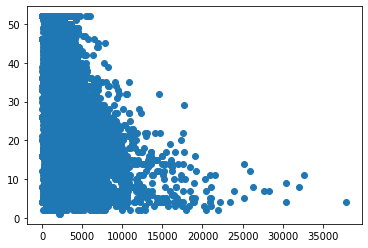

In [ ]:
plt.scatter(df.total_rooms, df.housing_median_age)

In [ ]:
X2 = df[['total_rooms', 'housing_median_age']].to_numpy()
X2

array([[5612.,   15.],
       [7650.,   19.],
       [ 720.,   17.],
       ...,
       [2677.,   17.],
       [2672.,   19.],
       [1820.,   52.]])

In [ ]:
best_dict_2 = get_scores_and_labels(combinations, X2)

In [ ]:
best_dict_2

{'best_epsilon': 0.01,
 'best_labels': 'bad',
 'best_min_samples': 2,
 'best_score': -10}

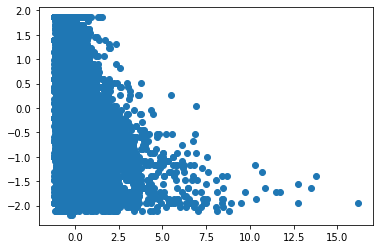

In [ ]:

X2_scaled = StandardScaler().fit_transform(X2)

plt.scatter(X2_scaled[:, 0], X2_scaled[:, 1])

In [ ]:
best_dict_3 = get_scores_and_labels(combinations, X2_scaled)


Combination (0.01, 2) on iteration 1 of 90 has 1884 clusters. Moving on
Combination (0.01, 5) on iteration 2 of 90 has 685 clusters. Moving on
Combination (0.01, 8) on iteration 3 of 90 has 337 clusters. Moving on
Combination (0.01, 11) on iteration 4 of 90 has 133 clusters. Moving on
Combination (0.01, 14) on iteration 5 of 90 has 60 clusters. Moving on
Index: 5, Score: -0.5312324216453211, Labels: [-1 -1 -1 ... -1 -1 11], NumClusters: 32
Combination (0.08071428571428571, 2) on iteration 7 of 90 has 99 clusters. Moving on
Index: 7, Score: -0.20384053173649058, Labels: [ 0 -1  0 ...  0  0  0], NumClusters: 34
Index: 8, Score: -0.1828630389511955, Labels: [ 0 -1  0 ...  0  0  0], NumClusters: 23
Index: 9, Score: -0.22366221116925375, Labels: [ 0 -1  0 ...  0  0  0], NumClusters: 23
Index: 10, Score: -0.23893089977584267, Labels: [ 0 -1  1 ...  1  1  1], NumClusters: 10
Index: 11, Score: -0.1439507321917493, Labels: [-1 -1  0 ...  0  0  0], NumClusters: 7
Index: 12, Score: 0.170115222274

In [ ]:
best_dict_3

{'best_epsilon': 0.8585714285714285,
 'best_labels': array([0, 0, 0, ..., 0, 0, 0]),
 'best_min_samples': 2,
 'best_score': 0.8739122955987667}

In [ ]:
fig = px.scatter(x=X2_scaled[:, 0], y=X2_scaled[:, 1], color=best_dict_3['best_labels'])
fig.show()